In [1]:
# import pycaret regression and init setup
from pycaret.regression import *
import pandas as pd

In [2]:
# 데이터 로드
file_path = r"C:\Users\dongj\OneDrive\바탕 화면\심화프로젝트\전처리파일1.csv"
data = pd.read_csv(file_path)

In [3]:
data.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,sales_total,discount_total,profit_total,profit_rate,Month
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,"Linden 10"" Round Wall Clock, Black",48.896,4.0,0.2,8.5568,195.584,0.8,34.2272,0.1750,1
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11.0,0.0,199.2606,5218.730,0.0,2191.8666,0.4200,1
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Wilson Jones Easy Flow II Sheet Lifters,3.600,2.0,0.0,1.7280,7.200,0.0,3.4560,0.4800,1
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,SAFCO Boltless Steel Shelving,454.560,5.0,0.2,-107.9580,2272.800,1.0,-539.7900,-0.2375,1
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5.0,0.6,-187.3815,707.100,3.0,-936.9075,-1.3250,1


In [4]:
data_tm = data.drop(['discount_total','profit_total','profit_rate','sales_total'],axis=1) # 컬럼 삭제

# data_tm = data.drop(['discount_total','profit_total','profit_rate','Sales','Quantity'],axis=1) # 컬럼 삭제

In [5]:
# data_tm['Sales'].describe() # 총매출 정보 보기

In [6]:
s = setup(data_tm, target = 'Sales', session_id = 123) # 총매출 셋업

,Description,Value
0,Session id,123
1,Target,Sales
2,Target type,Regression
3,Original data shape,"(3275, 20)"
4,Transformed data shape,"(3275, 46)"
5,Transformed train set shape,"(2292, 46)"
6,Transformed test set shape,"(983, 46)"
7,Numeric features,6
8,Categorical features,13
9,Preprocess,True


In [7]:
# # compare baseline models  모델 비교
# best = compare_models(fold=8)

In [8]:
data_tm.head(3)

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4.0,0.2,8.5568,1
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11.0,0.0,199.2606,1
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2.0,0.0,1.7280,1


In [9]:
# 모델 생성 (그라디언트 부스팅 리그레설) (경사 부스팅 회귀)
lr = create_model('lr', fold=8)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,177.3867,116873.9717,341.8684,0.7670,1.5038,5.9196
1,216.7464,233696.6897,483.4219,0.6868,1.4202,4.4140
2,212.7422,448862.7758,669.9722,0.1335,1.4341,4.6634
3,145.0405,63766.2614,252.5198,0.6312,1.4561,5.1444
4,189.0099,164905.5389,406.0856,0.4591,1.4614,4.7595
5,148.6011,83727.3496,289.3568,0.4442,1.3465,3.8952
6,142.8624,73303.6354,270.7464,0.3218,1.4611,5.8338
7,151.0697,96703.2176,310.9714,0.3905,1.4036,4.1798
Mean,172.9324,160229.9300,378.1178,0.4792,1.4359,4.8512


In [10]:
# # 모델 평가
# evaluate_model(gbr)

In [11]:
# Gradient Boosting Regressor 모델을 사용하여 21년도의 총 매출 예측
predictions_21 = predict_model(lr, data=data_tm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,97.6843,55585.4322,235.7656,0.8391,1.1418,3.0971


In [12]:
predictions_21.head(3)

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Month,Sales,prediction_label
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",4.0,0.2,8.556800,1,48.896000,29.568323
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",11.0,0.0,199.260605,1,474.429993,508.270367
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,2.0,0.0,1.728000,1,3.600000,-67.061405


In [13]:
data[['Order ID', 'Sales']]
predictions_21_merge = pd.merge(predictions_21, data, on='Order ID')

In [14]:
Y_sklearn = predictions_21[['Sales']]
Y_sklearn.head()

,Sales
0,48.896000
1,474.429993
2,3.600000
3,454.559998
4,141.419998


In [15]:
predicted_Y_sklearn = predictions_21[['prediction_label']]
predicted_Y_sklearn.head()

,prediction_label
0,29.568323
1,508.270367
2,-67.061405
3,631.115721
4,193.106423


In [16]:
from sklearn.metrics import r2_score
r_squared = r2_score(Y_sklearn, predicted_Y_sklearn)
r_squared

0.8390918364912348

In [17]:
# 예측 결과 확인
predictions_21.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Month,Sales,prediction_label
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",4.0,0.2,8.556800,1,48.896000,29.568323
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",11.0,0.0,199.260605,1,474.429993,508.270367
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,2.0,0.0,1.728000,1,3.600000,-67.061405
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,5.0,0.2,-107.958000,1,454.559998,631.115721
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",5.0,0.6,-187.381500,1,141.419998,193.106423


In [18]:
#===========================================================================================
# 수량에 맞게 예측 매출, 실제 매출 곱하기 함.
#===========================================================================================
predictions_21['prediction_total'] = predictions_21['prediction_label'] * predictions_21['Quantity']

predictions_21['sales_total'] = predictions_21['Sales'] * predictions_21['Quantity']

predictions_21.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Sub-Category,Product Name,Quantity,Discount,Profit,Month,Sales,prediction_label,prediction_total,sales_total
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,Furnishings,"Linden 10"" Round Wall Clock, Black",4.0,0.2,8.556800,1,48.896000,29.568323,118.273293,195.584000
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",11.0,0.0,199.260605,1,474.429993,508.270367,5590.974036,5218.729980
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Binders,Wilson Jones Easy Flow II Sheet Lifters,2.0,0.0,1.728000,1,3.600000,-67.061405,-134.122810,7.200000
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Storage,SAFCO Boltless Steel Shelving,5.0,0.2,-107.958000,1,454.559998,631.115721,3155.578603,2272.800049
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",5.0,0.6,-187.381500,1,141.419998,193.106423,965.532113,707.099976


In [19]:
# #서브 카테고리 실행할때 참조 풀것====================
# predic_21 = predictions_21.groupby('Sub-Category')['prediction_total'].sum()

#카테고리 실행할때 참조 풀것====================
predic_21 = predictions_21.groupby('Category')['prediction_total'].sum()

predic_21.head(17)

Category
Furniture          9.345254e+05
Office Supplies    1.358295e+06
Technology         1.147513e+06
Name: prediction_total, dtype: float64

In [20]:
# #서브 카테고리 실행할때 참조 풀것====================
# predic_20 = predictions_21.groupby('Sub-Category')['sales_total'].sum()

#카테고리 실행할때 참조 풀것====================
predic_20 = predictions_21.groupby('Category')['sales_total'].sum()
predic_20.head(17)

Category
Furniture          1071902.75
Office Supplies    1223604.25
Technology         1269698.25
Name: sales_total, dtype: float32

In [21]:
# 데이터프레임으로 변환
predic_21_df = pd.DataFrame(predic_21)
predic_20_df = pd.DataFrame(predic_20)

# 인덱스를 컬럼으로 변환
predic_21_df.reset_index(inplace=True)
predic_20_df.reset_index(inplace=True)

In [22]:
predic_21_df.head()

,Category,prediction_total
0,Furniture,9.345254e+05
1,Office Supplies,1.358295e+06
2,Technology,1.147513e+06


In [23]:
predic_20_df.head()

,Category,sales_total
0,Furniture,1071902.75
1,Office Supplies,1223604.25
2,Technology,1269698.25


In [24]:
# predic_21_df['Sales'] = predic_20_df['Sales']
# predic_21_df.head()

#서브 카테고리 실행할때 참조 풀것====================
# predic_join_df = pd.merge(predic_20_df, predic_21_df, on='Sub-Category')


#카테고리 실행할때 참조 풀것====================
predic_join_df = pd.merge(predic_20_df, predic_21_df, on='Category')

predic_join_df.head()

,Category,sales_total,prediction_total
0,Furniture,1071902.75,9.345254e+05
1,Office Supplies,1223604.25,1.358295e+06
2,Technology,1269698.25,1.147513e+06


In [25]:
predic_join_df['sales_rate'] = predic_join_df['prediction_total'] /predic_join_df['sales_total'] 
predic_join_df.head(17).round(1)

,Category,sales_total,prediction_total,sales_rate
0,Furniture,1071902.75,934525.4,0.9
1,Office Supplies,1223604.25,1358294.8,1.1
2,Technology,1269698.25,1147513.3,0.9


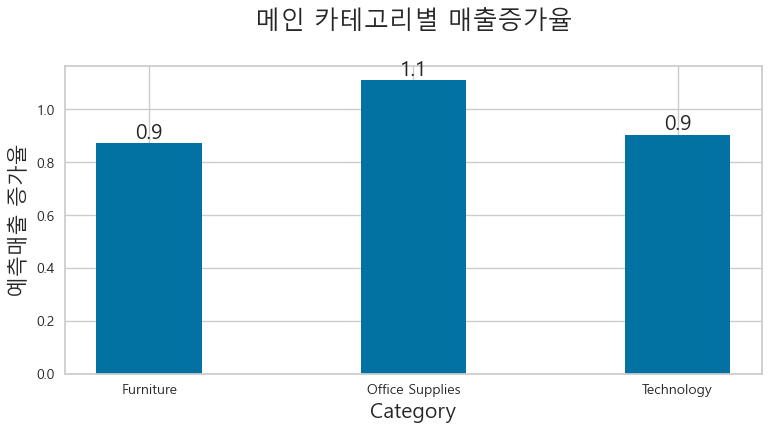

In [26]:
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트가 깨져서 맑은고딕으로 설정하고 시작 
plt.rcParams['axes.unicode_minus'] = False # Y축에 음수 부호가 깨져서 해결하는 코드 시작


plt.figure(figsize=(9, 4))
# plt.bar(merged_df['Sub-Category'], merged_df['score_average'])
plt.xlabel('Category', size = 15)
plt.ylabel('예측매출 증가율', size = 15)
plt.title('메인 카테고리별 매출증가율\n', size = 18)


#그래프를 bar라는 변수에 넣고,

# #서브 카테고리 실행할때 참조 풀것====================
# bar = plt.bar(predic_join_df['Sub-Category'], predic_join_df['sales_rate'])

# 카테고리 실행할때 참조 풀것====================
bar = plt.bar(predic_join_df['Category'], predic_join_df['sales_rate'], width=0.4)

#for 반복문으로, 
for rect in bar:
		#각 바의 세로길이 값을 구하고, 
    height = rect.get_height()
		#bar의 가장 정 가운데 x 좌표 구하기 : get_x()로 x축의 가장 왼쪽 부분 + get_width의 절반 값
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 15)


plt.xticks(rotation=-0)
plt.show()


========================================================================================
========================================================================================
# 카테고리별 월별 매출 예측
========================================================================================
========================================================================================

In [27]:
predictions_21.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Sub-Category,Product Name,Quantity,Discount,Profit,Month,Sales,prediction_label,prediction_total,sales_total
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,Furnishings,"Linden 10"" Round Wall Clock, Black",4.0,0.2,8.556800,1,48.896000,29.568323,118.273293,195.584000
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",11.0,0.0,199.260605,1,474.429993,508.270367,5590.974036,5218.729980
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Binders,Wilson Jones Easy Flow II Sheet Lifters,2.0,0.0,1.728000,1,3.600000,-67.061405,-134.122810,7.200000
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Storage,SAFCO Boltless Steel Shelving,5.0,0.2,-107.958000,1,454.559998,631.115721,3155.578603,2272.800049
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",5.0,0.6,-187.381500,1,141.419998,193.106423,965.532113,707.099976


In [28]:
# agg 메서드를 사용하면 그룹화된 데이터의 여러 통계량을 한 번에 계산할 수 있음.

predictions_21_month = predictions_21.groupby(['Sub-Category', 'Month']).agg({'sales_total': 'sum', 'prediction_total': 'sum'}).reset_index()


In [29]:
predictions_21_month.head(15)

,Sub-Category,Month,sales_total,prediction_total
0,Accessories,1,11301.078125,12402.718747
1,Accessories,2,10463.293945,7024.915636
2,Accessories,3,20155.707031,21126.743647
3,Accessories,4,9460.187500,10962.078591
4,Accessories,5,20128.271484,17885.721218
5,Accessories,6,30312.906250,33160.915639
6,Accessories,7,33918.855469,26852.531114
7,Accessories,8,35071.253906,23258.641782
8,Accessories,9,51384.671875,43087.624334
9,Accessories,10,29730.134766,26132.337434


In [30]:
predictions_21_month.columns

Index(['Sub-Category', 'Month', 'sales_total', 'prediction_total'], dtype='object')

In [31]:
columns_category = [predictions_21_month.columns]
columns_category

[Index(['Sub-Category', 'Month', 'sales_total', 'prediction_total'], dtype='object')]

In [32]:
predictions_21_month['Sub-Category'].unique()

['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', ..., 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables']
Length: 17
Categories (17, object): ['Accessories', 'Appliances', 'Art', 'Binders', ..., 'Phones', 'Storage', 'Supplies', 'Tables']

In [33]:
categories = predictions_21_month['Sub-Category'].unique()  
filter_categories = {}

for category in categories:
    filter_category = predictions_21_month[predictions_21_month['Sub-Category'] == category]
    filter_categories[category] = filter_category

# 모든 카테고리의 데이터프레임을 각각의 변수에 저장
for category, df in filter_categories.items():
    globals()[f"{category}_df"] = df


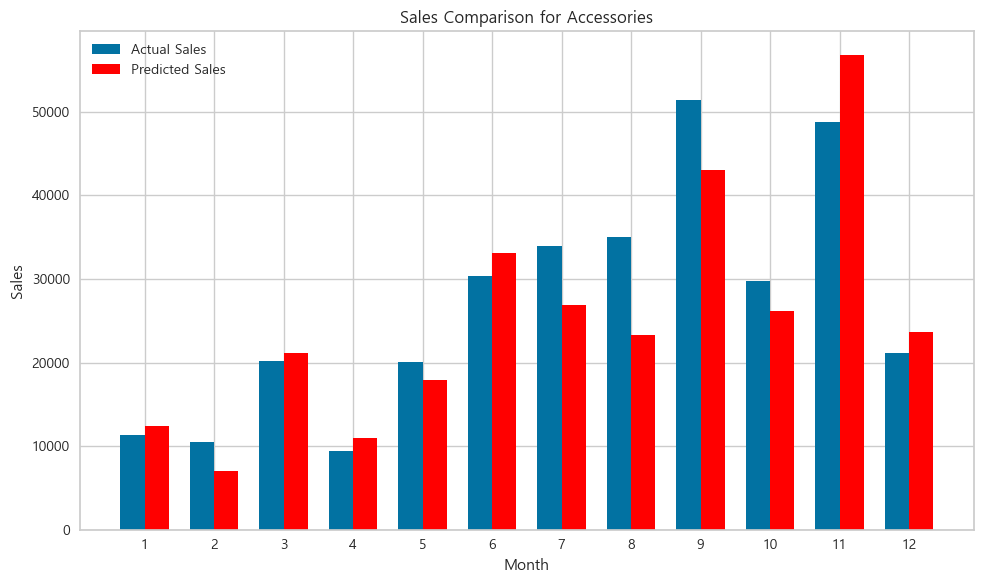

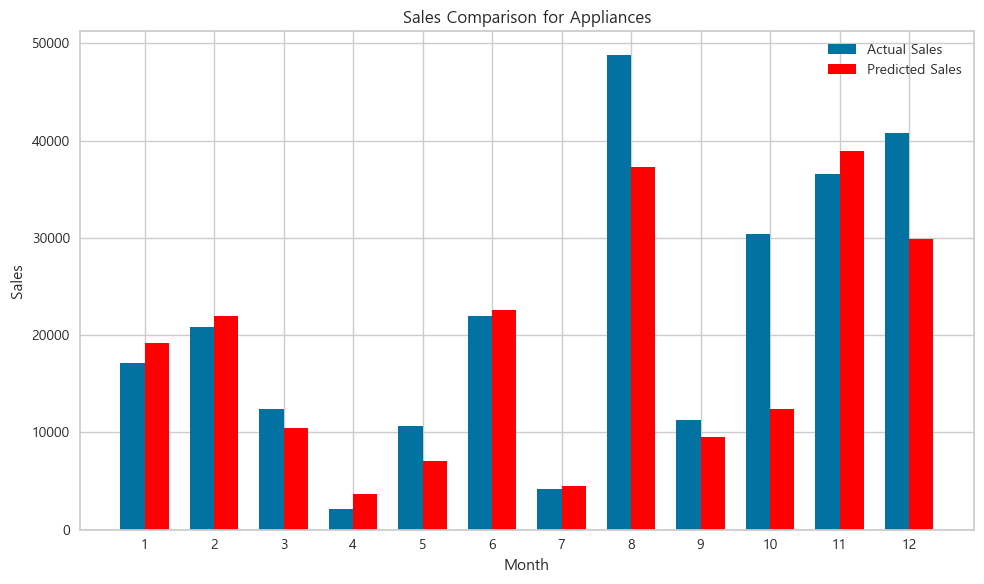

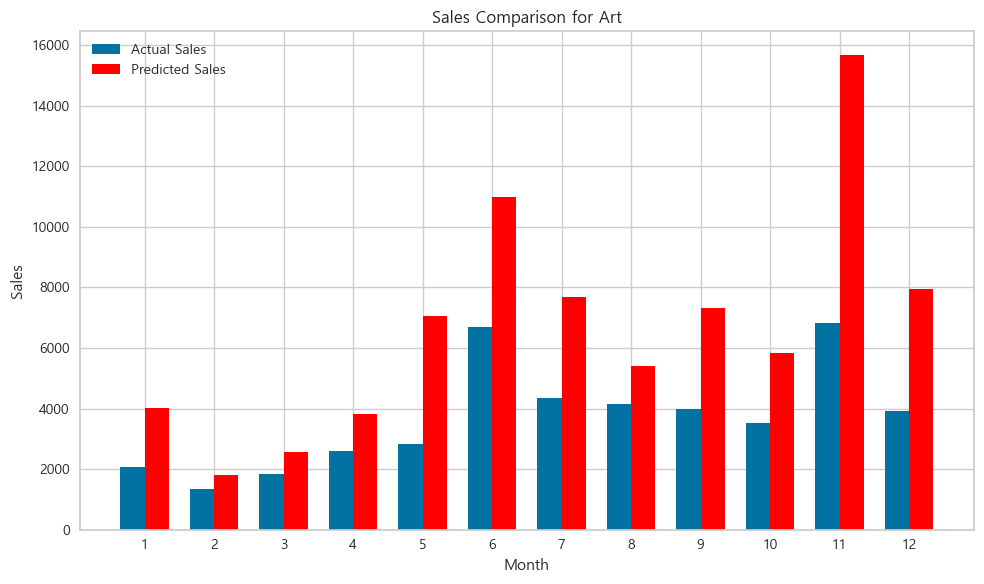

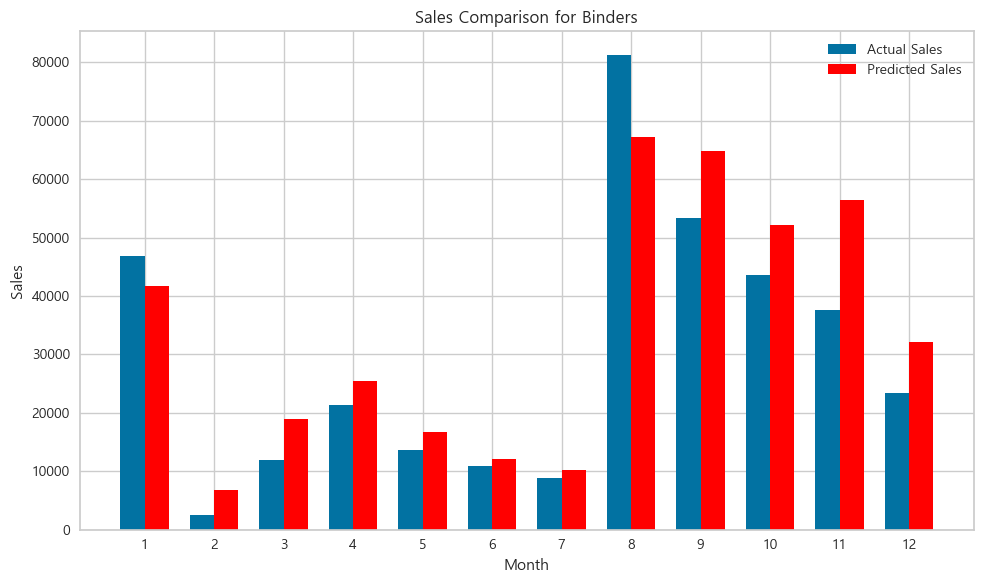

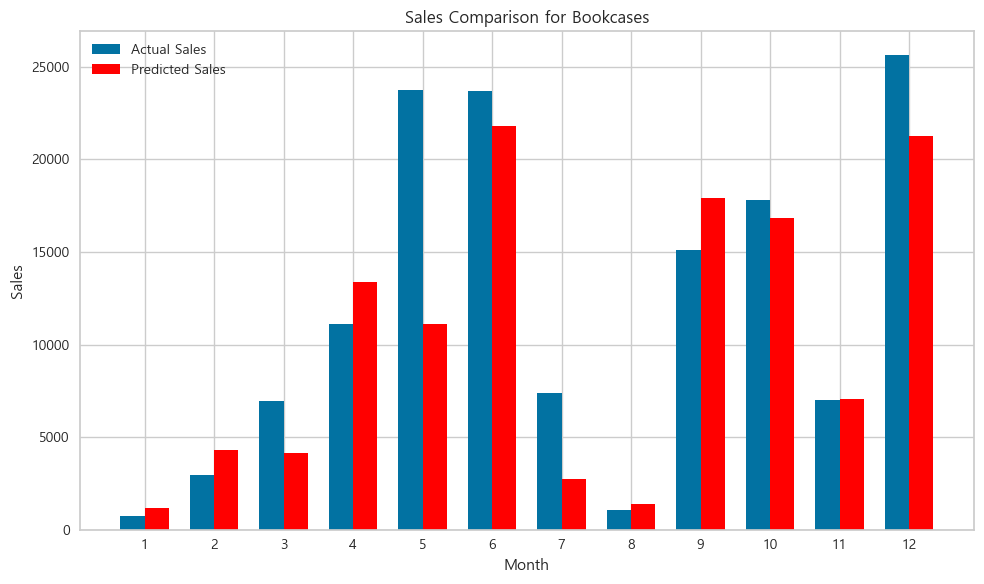

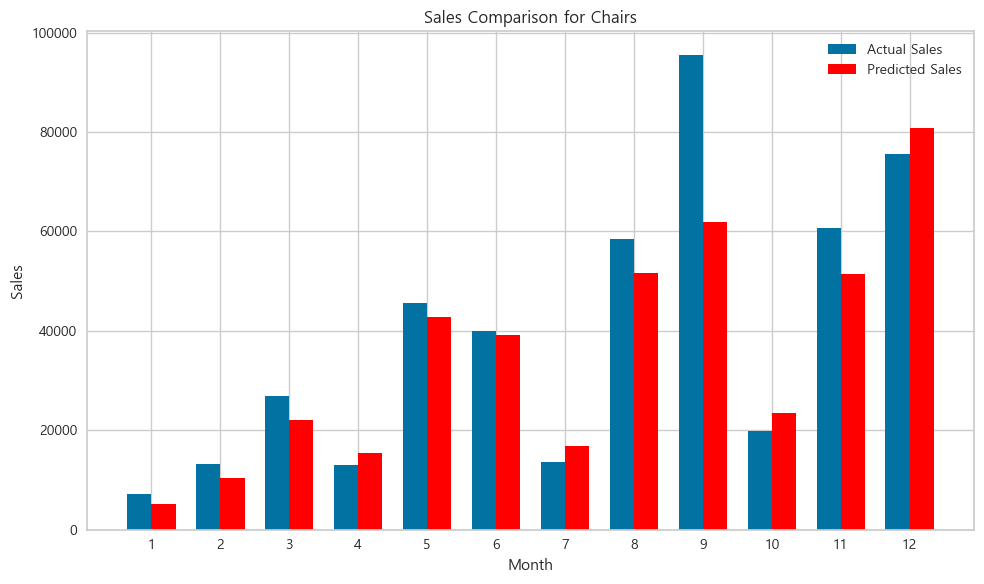

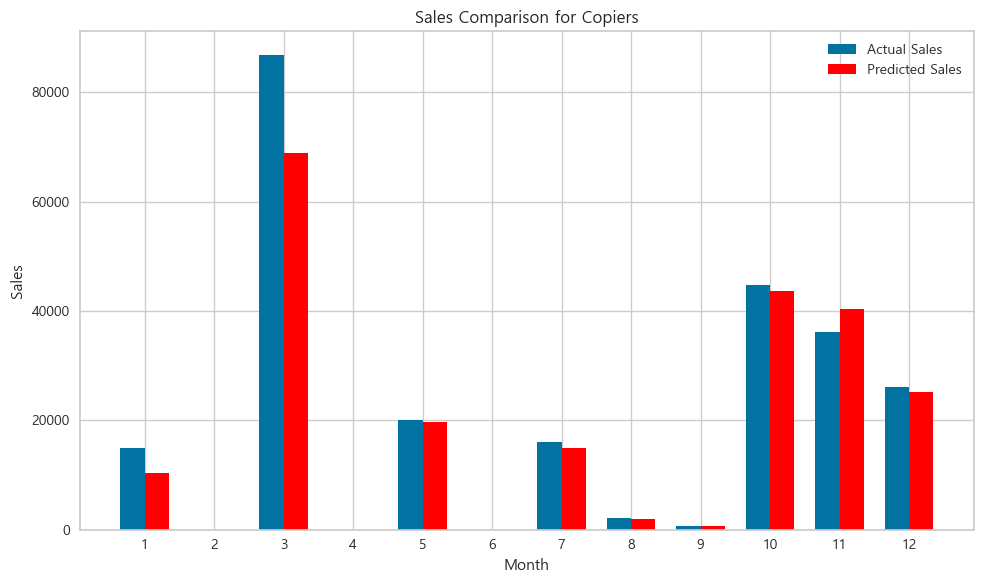

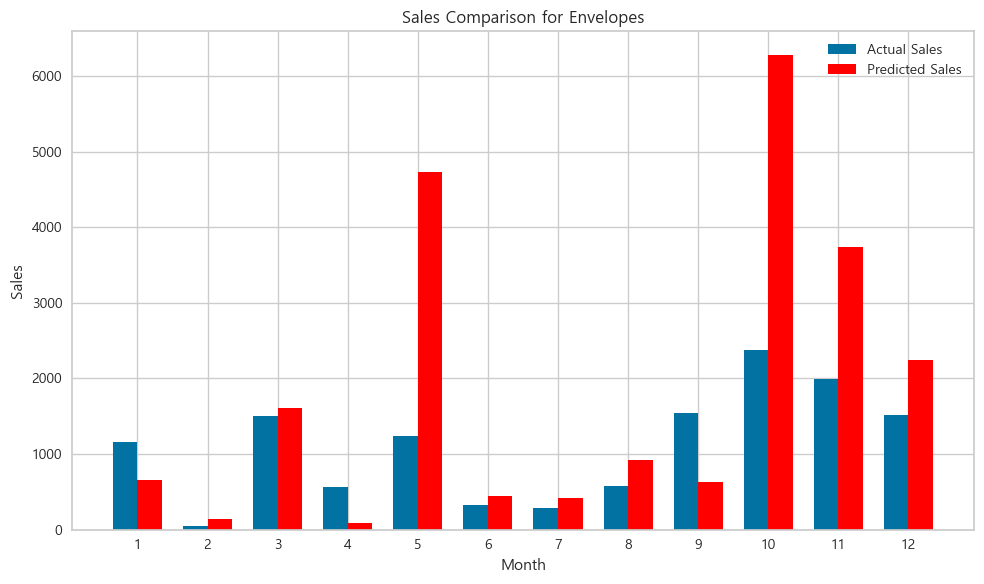

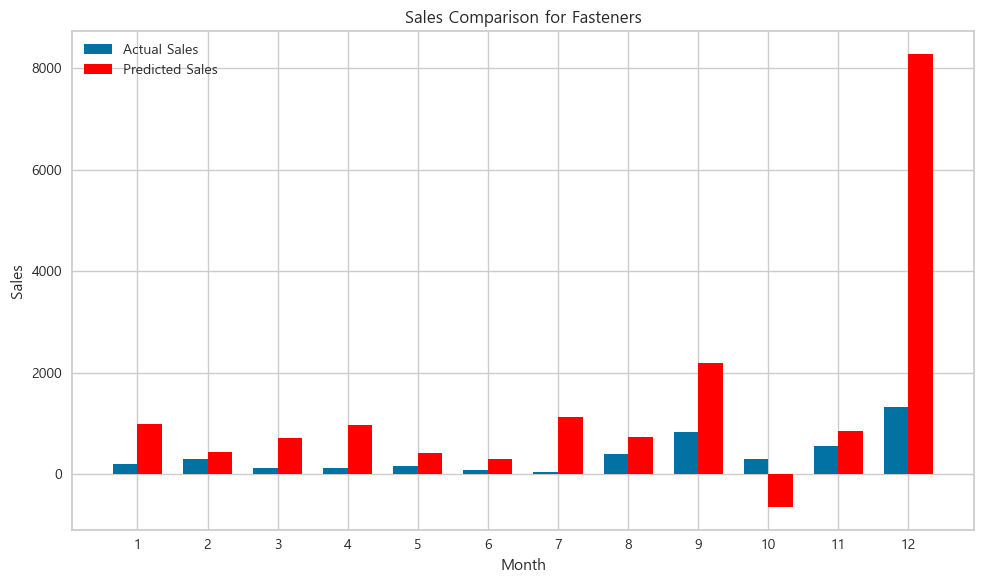

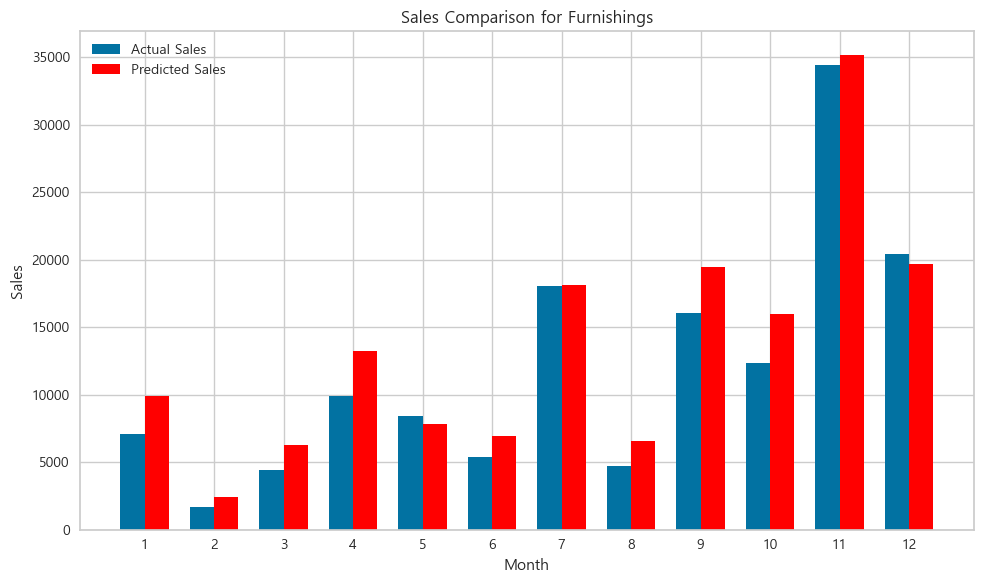

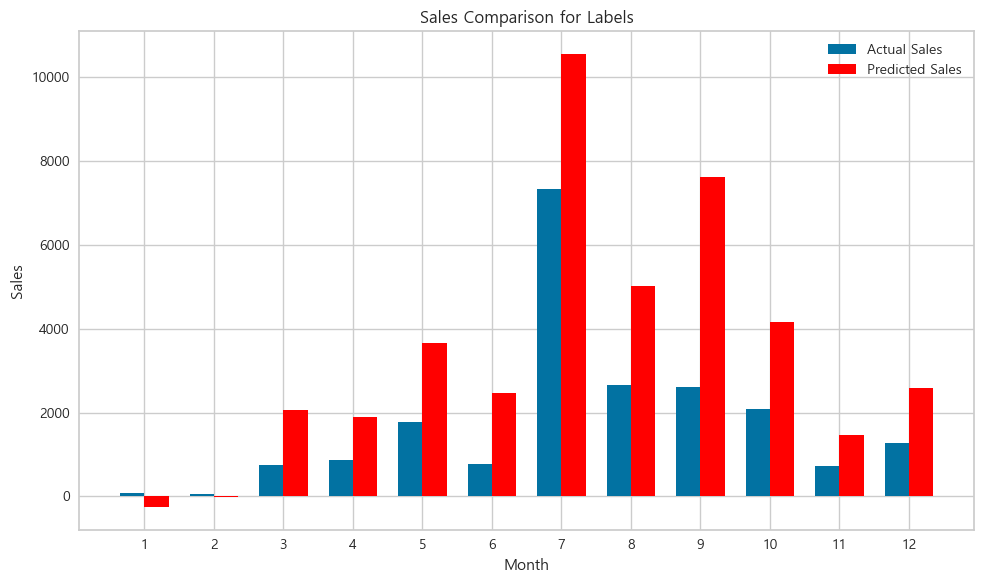

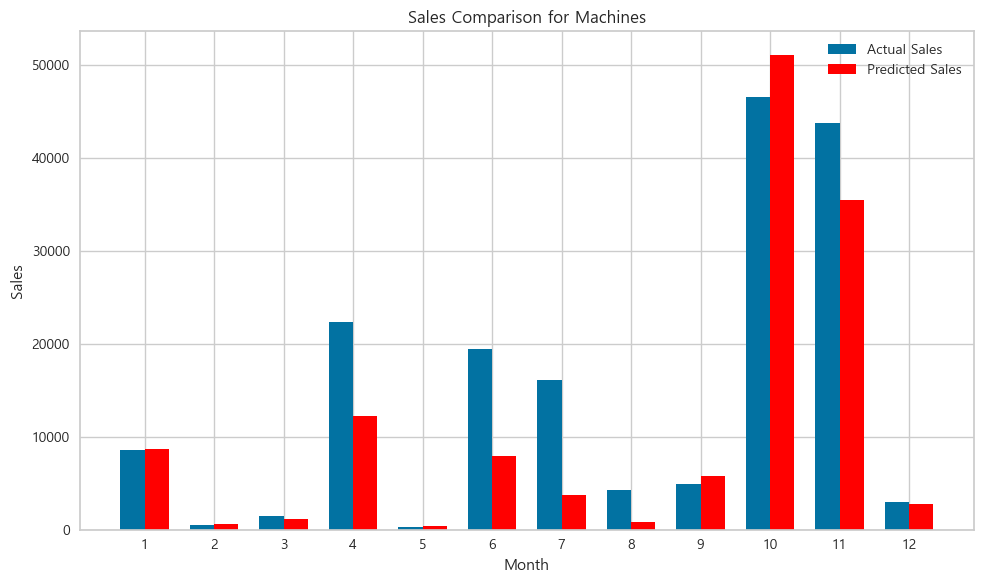

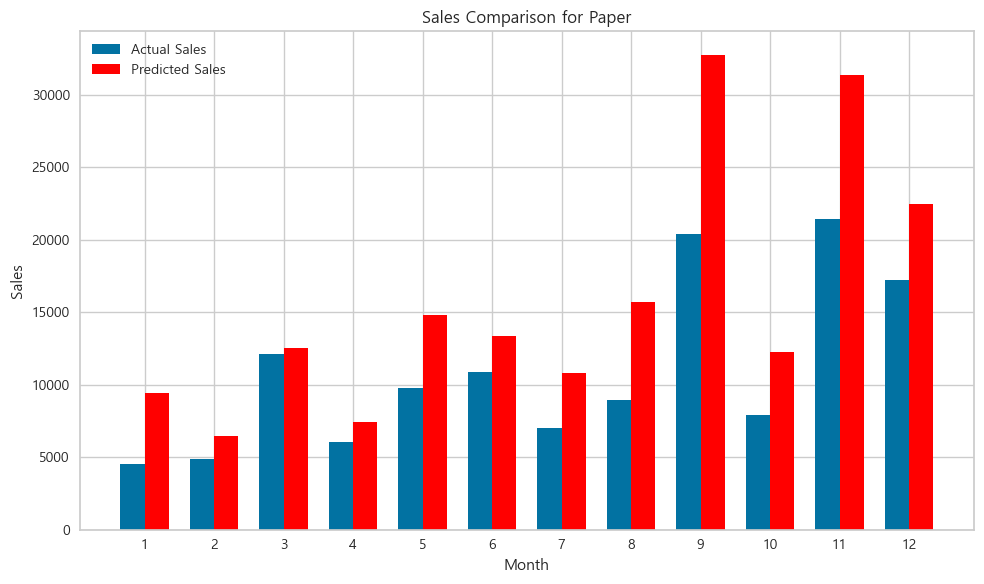

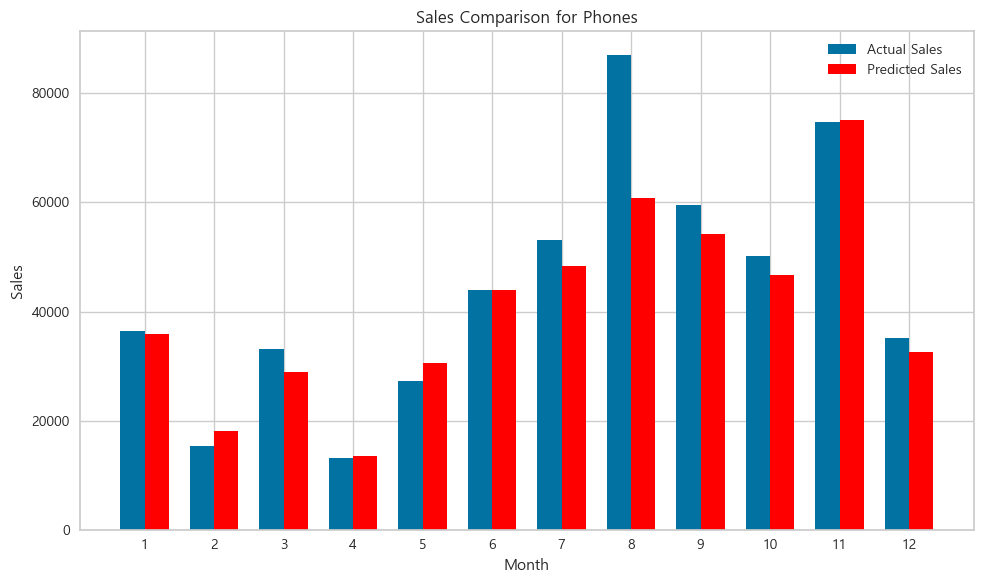

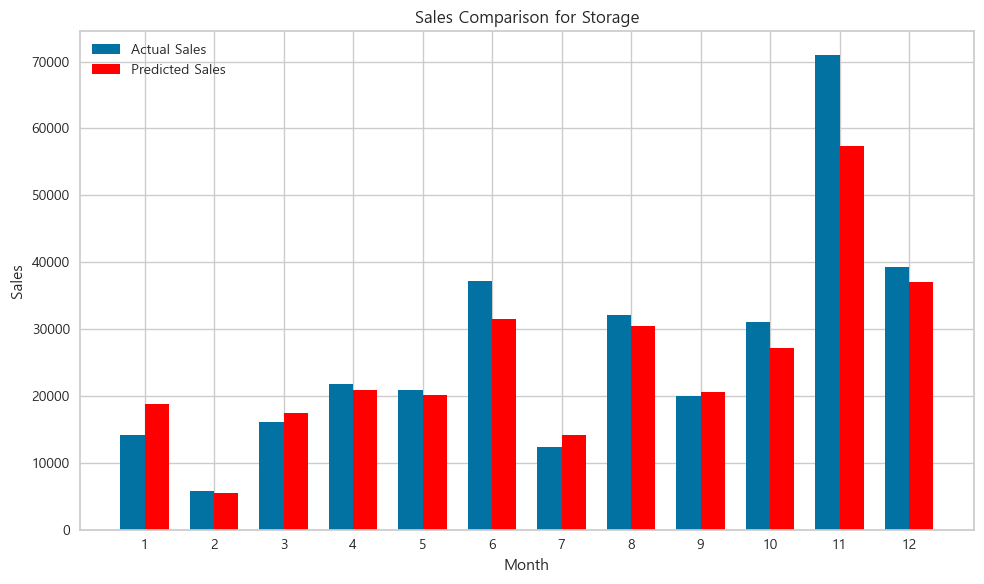

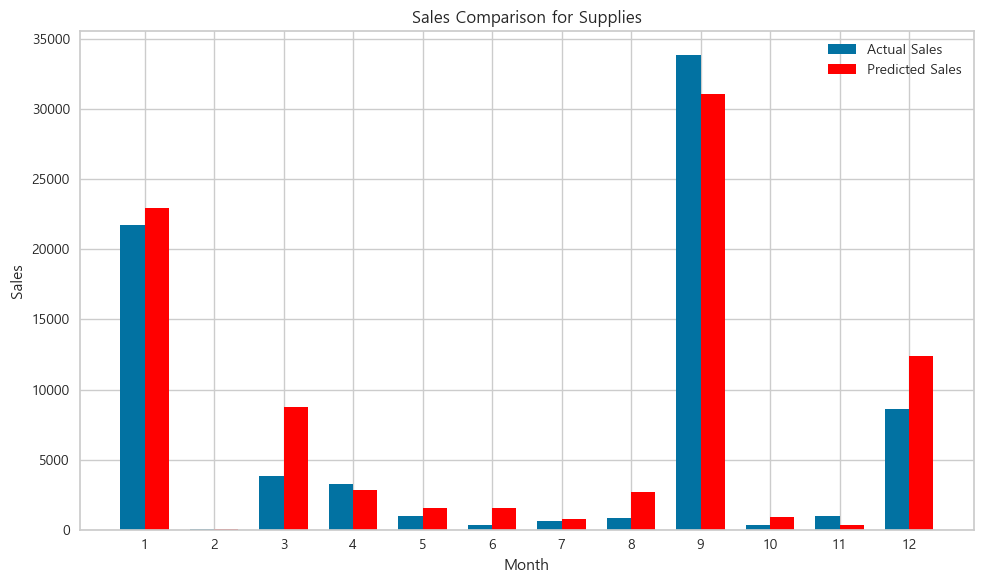

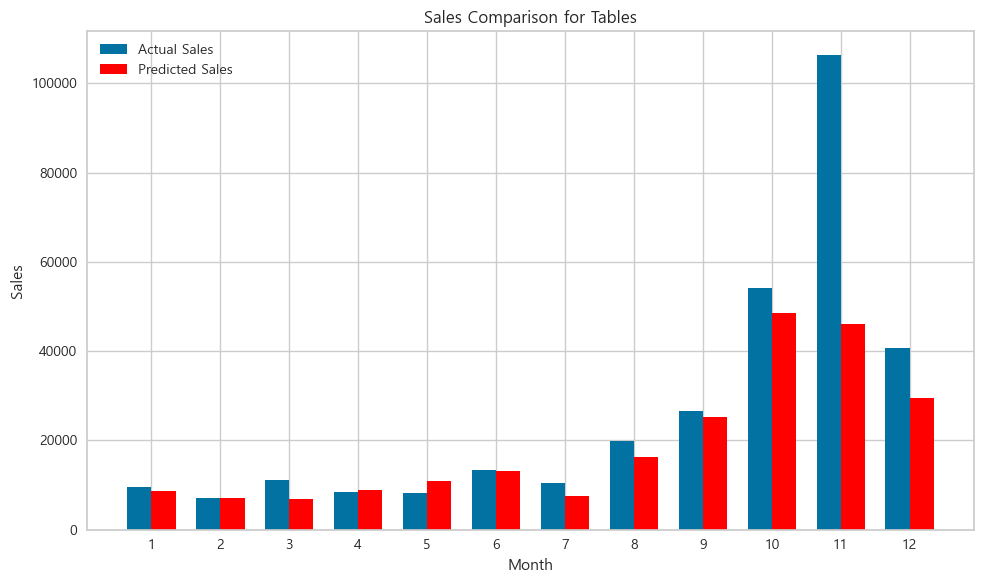

In [34]:

import numpy as np

# 딕셔너리에 저장된 데이터프레임을 순회하며 시각화
for category, df in filter_categories.items():
    plt.figure(figsize=(10, 6))
    
    bar_width = 0.35
    index = np.arange(len(df['Month']))
    
    plt.bar(index, df['sales_total'], bar_width, label='Actual Sales')
    plt.bar(index + bar_width, df['prediction_total'], bar_width, label='Predicted Sales', color='red')
    
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.title(f'Sales Comparison for {category}')
    plt.xticks(index + bar_width / 2, df['Month'])
    plt.legend()
    plt.tight_layout()
    plt.show()



# 클러스터링
- 비슷한 특성을 가진 데이터를 그룹으로 묶는 데이터 마이닝 기법. 
- 이를 통해 데이터의 유사성과 패턴을 찾아내고, 데이터를 보다 의미 있는 부분으로 분류할 수 있음.
- 예를 들면 고객 세그먼테이션, 이미지 분류, 텍스트 분석 등에 사용될 수 있음. 
- 클러스터링 알고리즘은 데이터 간의 유사성을 측정하고, 이를 기반으로 클러스터를 형성함. 
- 유사한 특성을 가진 데이터가 동일한 클러스터에 속하게 되므로, 데이터를 조직화하고 분석하기에 유용함.

In [35]:
# # 필요한 라이브러리 불러오기
# from pycaret.clustering import *
# import pandas as pd

# # 데이터 로드
# file_path = r"C:\Users\dongj\OneDrive\바탕 화면\심화프로젝트\전처리파일1.csv"
# data = pd.read_csv(file_path)

# # total 계산한거 컬럼 삭제
# data_tm = data.drop(['discount_total', 'profit_total', 'profit_rate', 'sales_total'], axis=1)

# # 클러스터링 셋업
# s = setup(data_tm, session_id=123)

# # 클러스터링 알고리즘 비교
# best = compare_models()

# # 최적의 클러스터링 알고리즘 선택
# kmeans = create_model('kmeans')

# # 클러스터링 모델 학습
# kmeans_model = assign_model(kmeans)

# # 클러스터링 결과 확인
# kmeans_results = kmeans_model.head()
# print(kmeans_results)


,Description,Value
0,Session id,123
1,Original data shape,"(3275, 20)"
2,Transformed data shape,"(3275, 6129)"
3,Numeric features,7
4,Categorical features,13
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,144.5594,158725.3522,367.9978,0.5430,1.2004,3.1590,0.1520
et,Extra Trees Regressor,150.1648,164638.0250,379.1034,0.4939,1.2029,3.2435,0.2100
rf,Random Forest Regressor,152.4479,174737.6756,387.7975,0.4763,1.2105,3.2732,0.4610
catboost,CatBoost Regressor,138.6655,209088.5055,412.3710,0.4570,1.1062,2.5141,0.7940
lightgbm,Light Gradient Boosting Machine,149.5734,206161.7544,409.0407,0.4565,1.1866,3.0345,0.2490
lr,Linear Regression,172.2658,167377.5155,384.0701,0.4536,1.4112,4.4565,0.7720
ridge,Ridge Regression,172.3041,167444.9753,384.1405,0.4534,1.4116,4.4553,0.0460
lasso,Lasso Regression,174.0720,169510.9922,386.5472,0.4468,1.4138,4.4371,0.0600
llar,Lasso Least Angle Regression,174.0720,169530.7251,386.5714,0.4467,1.4125,4.4340,0.0460
br,Bayesian Ridge,173.9161,169795.2418,386.9850,0.4452,1.4102,4.4050,0.0480


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6023,21717.2830,0.5370,0,0,0


   Order Date  Row ID        Order ID       Ship Mode Customer ID  \
0  2020-01-01     849  CA-2017-107503  Standard Class    GA-14725   
1  2020-01-01    4010  CA-2017-144463  Standard Class    SC-20725   
2  2020-01-01    6683  CA-2017-154466     First Class    DP-13390   
3  2020-01-01    8070  CA-2017-151750  Standard Class    JM-15250   
4  2020-01-01    8071  CA-2017-151750  Standard Class    JM-15250   

       Segment        Country         City       State  Postal Code  ...  \
0     Consumer  United States       Lorain        Ohio        44052  ...   
1     Consumer  United States  Los Angeles  California        90036  ...   
2  Home Office  United States     Franklin   Wisconsin        53132  ...   
3     Consumer  United States   Huntsville       Texas        77340  ...   
4     Consumer  United States   Huntsville       Texas        77340  ...   

        Product ID         Category Sub-Category  \
0  FUR-FU-10003878        Furniture  Furnishings   
1  FUR-FU-10001215      

In [36]:
# # 클러스터링 모델 시각화
# plot_model(kmeans, plot='cluster')